In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import networkx as nx
import geopandas as gpd
import eurostat
import requests
import urllib.parse
from mpl_toolkits.mplot3d import Axes3D

In [5]:
shapefile_data = "/Users/joebacchus/Desktop/Bartlett CASA/NUTS Shapefiles/NUTS_RG_20M_2021_3035.shp"
citations_data = pd.read_csv("/Users/joebacchus/Desktop/Bartlett CASA/Data Updated/Patents/EPO_citation_UK_withIPC_loc.csv")
IPC_translations = pd.read_csv("/Users/joebacchus/Desktop/Bartlett CASA/All_IPC.txt", sep="	")

In [115]:
# Modifiable parameters
NUTS_level = 3
IPC_level = 1

# Loading shapefile and restricting to UK and selected NUTS
space = gpd.read_file(shapefile_data)
space_GB = space.loc[space['CNTR_CODE'] == "UK"]
space_GB_NUTS3 = space_GB.loc[space['LEVL_CODE'] == NUTS_level]

# Restricting citations data to UK
citations_data_GB = citations_data.loc[citations_data['ctry_code'] == "GB"]

# Merging citations and shapefile
merged_data = space_GB_NUTS3.merge(citations_data_GB, left_on='FID', right_on='reg_code')

IPC_reduced = IPC_translations.loc[IPC_translations['IPC'].str.len()==IPC_level]
merged_data["IPC"] = merged_data["IPC"].str[0:IPC_level]
merged_data_named = merged_data.merge(IPC_reduced, left_on='IPC', right_on='IPC')

contents = np.sort(list(merged_data_named["IPC"].unique())) # All possible IPC
dates = np.sort(list(merged_data_named["prio_year"].unique())) # All possible IPC

In [116]:
select = 5
merged_data_named_year = merged_data_named.loc[merged_data_named['prio_year'] == dates[select]] # Full data
edge_list = np.array(merged_data_named_year[['Citing_appln_id', 'Cited_Appln_id']]) # Creating edge list
merged_data_named.loc[merged_data_named['Citing_appln_id'] == int(np.array(graph.nodes())[7])]['prio_year'].unique()

array([1980])

In [117]:
graph = nx.DiGraph()
graph.add_edges_from(edge_list)
for i in range(len(np.array(graph.nodes()))):
    graph.add_node(np.array(graph.nodes())[i], date=merged_data_named.loc[merged_data_named['Citing_appln_id'] == int(np.array(graph.nodes())[7])]['prio_year'].unique())

In [114]:
graph.nodes(data=True)

NodeDataView({16531370.0: {'date': array([1980])}, 16454918.0: {'date': array([1980])}, 16533173.0: {'date': array([1980])}, 16478577.0: {'date': array([1980])}, 16534560.0: {'date': array([1980])}, 16501862.0: {'date': array([1980])}, 16538289.0: {'date': array([1980])}, 16481968.0: {'date': array([1980])}, 16538700.0: {'date': array([1980])}, 16508981.0: {'date': array([1980])}, 16530156.0: {'date': array([1980])}, 16453081.0: {'date': array([1980])}, 16530046.0: {'date': array([1980])}, 16478042.0: {'date': array([1980])}, 16533512.0: {'date': array([1980])}, 16452255.0: {'date': array([1980])}, 16593382.0: {'date': array([1980])}, 16531258.0: {'date': array([1980])}, 16439042.0: {'date': array([1980])}, 258649.0: {'date': array([1980])}, 258639.0: {'date': array([1980])}, 16532616.0: {'date': array([1980])}, 16562506.0: {'date': array([1980])}, 16527415.0: {'date': array([1980])}, 16437629.0: {'date': array([1980])}, 16439222.0: {'date': array([1980])}, 16533601.0: {'date': array([

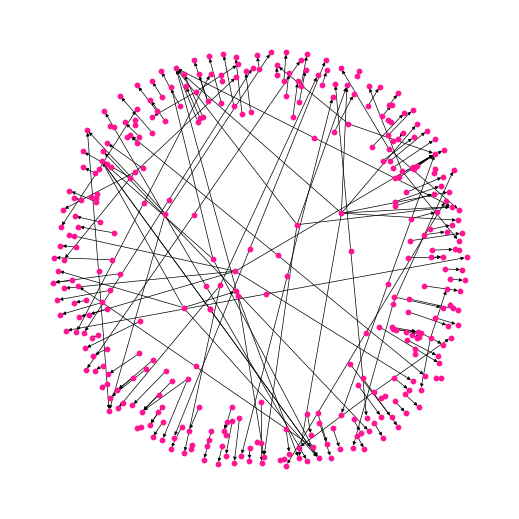

In [57]:
plt.figure(figsize=(5,5))
nx.draw(graph,
        with_labels = False,
        node_color='deeppink',
        node_size=10,
        width=0.5,
        arrowsize=5,
        font_color="black",
        font_size=2)